SENTIMENT ANALYSIS using RNN

In [7]:
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Bidirectional, Dense, Embedding
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
import numpy as np




# Getting reviews with words that come under 5000
# most occurring words in the entire
# corpus of textual review data
vocab_size = 5000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

print(x_train[0])




# Getting all the words from word_index dictionary
word_idx = imdb.get_word_index()

# Originally the index number of a value and not a key,
# hence converting the index as key and the words as values
word_idx = {i: word for word, i in word_idx.items()}

# again printing the review
print([word_idx[i] for i in x_train[0]])




# Get the minimum and the maximum length of reviews
print("Max length of a review:: ", len(max((x_train+x_test), key=len)))
print("Min length of a review:: ", len(min((x_train+x_test), key=len)))




from tensorflow.keras.preprocessing import sequence

# Keeping a fixed length of all reviews to max 400 words
max_words = 400

x_train = sequence.pad_sequences(x_train, maxlen=max_words)
x_test = sequence.pad_sequences(x_test, maxlen=max_words)

x_valid, y_valid = x_train[:64], y_train[:64]
x_train_, y_train_ = x_train[64:], y_train[64:]
# fixing every word's embedding size to be 32
embd_len = 32

# Creating a RNN model
RNN_model = Sequential(name="Simple_RNN")
RNN_model.add(Embedding(vocab_size,
						embd_len,
						input_length=max_words))

# In case of a stacked(more than one layer of RNN)
# use return_sequences=True
RNN_model.add(SimpleRNN(128,
						activation='tanh',
						return_sequences=False))
RNN_model.add(Dense(1, activation='sigmoid'))

# Building the model by running a dummy input
RNN_model.build(input_shape=(None, max_words))

# printing model summary
print(RNN_model.summary())

# Compiling model
RNN_model.compile(
	loss="binary_crossentropy",
	optimizer='adam',
	metrics=['accuracy']
)

# Training the model
history = RNN_model.fit(x_train_, y_train_,
						batch_size=64,
						epochs=5,
						verbose=1,
						validation_data=(x_valid, y_valid))

# Printing model score on test data
print()
print("Simple_RNN Score---> ", RNN_model.evaluate(x_test, y_test, verbose=0))

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32]
['the', 'as', 'you', 'with', 'out', 'themselves', 'powerful', 'lets', 'love

Model: "Simple_RNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)         │ (None, 400, 32)        │       160,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_6 (SimpleRNN)        │ (None, 128)            │        20,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 180,737 (706.00 KB)

 Trainable params: 180,737 (706.00 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/5
390/390 ━━━━━━━━━━━━━━━━━━━━ 73s 177ms/step - accuracy: 0.5514 - loss: 0.6809 - val_accuracy: 0.5000 - val_loss: 0.6692
Epoch 2/5
390/390 ━━━━━━━━━━━━━━━━━━━━ 63s 163ms/step - accuracy: 0.6782 - loss: 0.5916 - val_accuracy: 0.8750 - val_loss: 0.2986
Epoch 3/5
390/390 ━━━━━━━━━━━━━━━━━━━━ 69s 177ms/step - accuracy: 0.8002 - loss: 0.4582 - val_accuracy: 0.8281 - val_loss: 0.4171
Epoch 4/5
390/390 ━━━━━━━━━━━━━━━━━━━━ 69s 176ms/step - accuracy: 0.8186 - loss: 0.4148 - val_accuracy: 0.5469 - val_loss: 0.6877
Epoch 5/5
390/390 ━━━━━━━━━━━━━━━━━━━━ 65s 166ms/step - accuracy: 0.6727 - loss: 0.5974 - val_accuracy: 0.5938 - val_loss: 0.6661

Simple_RNN Score--->  [0.6332221627235413, 0.6272000074386597]


SENTIMENT ANALYSIS using RNN with GRAPHS

['<unk>', 'this', 'film', 'was', 'just', 'brilliant', 'casting', 'location', 'scenery', 'story', 'direction', "everyone's", 'really', 'suited', 'the', 'part', 'they', 'played', 'and', 'you', 'could', 'just', 'imagine', 'being', 'there', 'robert', '<unk>', 'is', 'an', 'amazing', 'actor', 'and', 'now', 'the', 'same', 'being', 'director', '<unk>', 'father', 'came', 'from', 'the', 'same', 'scottish', 'island', 'as', 'myself', 'so', 'i', 'loved', 'the', 'fact', 'there', 'was', 'a', 'real', 'connection', 'with', 'this', 'film', 'the', 'witty', 'remarks', 'throughout', 'the', 'film', 'were', 'great', 'it', 'was', 'just', 'brilliant', 'so', 'much', 'that', 'i', 'bought', 'the', 'film', 'as', 'soon', 'as', 'it', 'was', 'released', 'for', '<unk>', 'and', 'would', 'recommend', 'it', 'to', 'everyone', 'to', 'watch', 'and', 'the', 'fly', '<unk>', 'was', 'amazing', 'really', 'cried', 'at', 'the', 'end', 'it', 'was', 'so', 'sad', 'and', 'you', 'know', 'what', 'they', 'say', 'if', 'you', 'cry', 'at', 

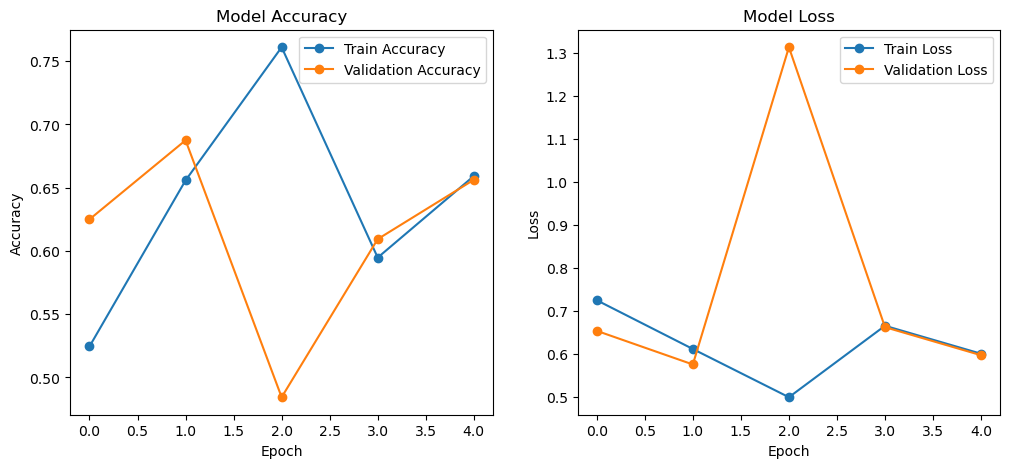

In [6]:
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding, Dropout
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt

# Load IMDB dataset with a vocabulary size of 5000
vocab_size = 5000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

# Get the word index to decode reviews (optional, for understanding the data)
word_idx = imdb.get_word_index()
word_idx = {i: word for word, i in word_idx.items()}  # Reverse the word index

# Print the first review (as words) to understand the data
print([word_idx.get(i - 3, "<unk>") for i in x_train[0]])

# Check the max and min length of reviews
print(f"Max length of a review: {len(max((x_train + x_test), key=len))}")
print(f"Min length of a review: {len(min((x_train + x_test), key=len))}")

# Pad sequences to make all reviews of equal length (400 words)
max_words = 400
x_train = sequence.pad_sequences(x_train, maxlen=max_words)
x_test = sequence.pad_sequences(x_test, maxlen=max_words)

# Split off a small part of the training data for validation
x_valid, y_valid = x_train[:64], y_train[:64]
x_train_, y_train_ = x_train[64:], y_train[64:]

# Set the embedding dimension and define the model
embd_len = 32

RNN_model = Sequential(name="Simple_RNN_with_Dropout")
RNN_model.add(Embedding(vocab_size, embd_len, input_length=max_words))
RNN_model.add(SimpleRNN(128, activation='tanh'))  # RNN layer
RNN_model.add(Dropout(0.5))  # Dropout layer to prevent overfitting
RNN_model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
RNN_model.compile(
    loss="binary_crossentropy",
    optimizer='adam',
    metrics=['accuracy']
)

# EarlyStopping callback to stop training when validation loss stops improving
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = RNN_model.fit(
    x_train_, y_train_,
    batch_size=64,
    epochs=10,
    verbose=1,
    validation_data=(x_valid, y_valid),
    callbacks=[early_stopping]
)

# Evaluate the model on the test data
test_loss, test_accuracy = RNN_model.evaluate(x_test, y_test, verbose=0)
print(f"\nTest Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Plotting the training and validation loss and accuracy
def plot_history(history):
    # Accuracy Plot
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss', marker='o')
    plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Call the function to plot the history
plot_history(history)
